<a href="https://colab.research.google.com/github/alexuqt/neural-networks/blob/main/7_RNN_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from numpy import array

import matplotlib.pyplot as plt
import pickle
import time

from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding

In [ ]:
# source text
data = "I am not the kind of girl"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# path = '/content/drive/My Drive/CTTC/1661-0.txt'
path = '/content/drive/My Drive/CTTC/RNN-data/all_tswift_lyrics.txt'
# path = '/content/drive/My Drive/CTTC/RNN-data/NosotrosEnLaLuna.txt'
data = open(path).read().lower()
print('length of the corpus is: :', len(data))

Mounted at /content/drive
length of the corpus is: : 264959


In [ ]:
# integer encode text
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])
encoded_data = tokenizer.texts_to_sequences([data])[0]
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1  # 0 is reserved for padding so that's why we added 1

print('Tokenizer/Dictionary size (0 padding included):', vocab_size, word_index)
print("Encoded data:", encoded_data)

Tokenizer/Dictionary size (0 padding included): 3173 {'you': 1, 'i': 2, 'the': 3, 'and': 4, 'to': 5, 'a': 6, 'me': 7, 'it': 8, 'in': 9, 'my': 10, 'that': 11, 'your': 12, 'on': 13, 'all': 14, 'but': 15, 'of': 16, 'know': 17, 'be': 18, 'we': 19, 'was': 20, 'oh': 21, 'like': 22, 'is': 23, "i'm": 24, 'when': 25, 'this': 26, "don't": 27, 'so': 28, 'just': 29, 'now': 30, 'love': 31, 'never': 32, 'what': 33, 'back': 34, 'for': 35, 'up': 36, "it's": 37, "you're": 38, 'with': 39, 'got': 40, 'out': 41, 'baby': 42, 'at': 43, 'say': 44, 'time': 45, 'do': 46, 'if': 47, 'see': 48, 'down': 49, 'come': 50, 'are': 51, 'way': 52, 'were': 53, 'there': 54, 'can': 55, 'he': 56, 'go': 57, 'not': 58, 'think': 59, 'been': 60, 'could': 61, 'here': 62, 'have': 63, 'one': 64, "'cause": 65, "i'll": 66, 'gonna': 67, 'tell': 68, 'said': 69, 'ever': 70, 'about': 71, 'would': 72, 'wanna': 73, 'how': 74, 'she': 75, 'had': 76, 'night': 77, "can't": 78, 'right': 79, 'they': 80, 'take': 81, 'away': 82, 'eyes': 83, 'look'

In [ ]:
# create word -> word sequences
sequences = list()
for i in range(2, len(encoded_data)):
	sequence = encoded_data[i-2:i+1]
	sequences.append(sequence)

# print examples
print('Total sequences:', len(sequences))
for sequence in sequences[:5]:
  decoded_words = [tokenizer.index_word[idx] for idx in sequence]
  # decoded_text = ' '.join(decoded_words) # passa de ['you', "don't"] a "you don't"
  print(decoded_words)

Total sequences: 53202
['he', 'said', 'the']
['said', 'the', 'way']
['the', 'way', 'my']
['way', 'my', 'blue']
['my', 'blue', 'eyes']


In [ ]:
# split sequences into input (X) and output (y)
sequences = array(sequences)
X, y = sequences[:,[0,1]],sequences[:,2]

print(f"{'Input':<20} {'Output'}")
for inp, outp in zip(X[:5], y[:5]):
  decoded_input = [tokenizer.index_word[idx] for idx in inp]
  formatted_input = str(decoded_input)
  formatted_output = tokenizer.index_word[outp]
  print(f"{formatted_input:<20} {formatted_output}")

Input                Output
['he', 'said']       the
['said', 'the']      way
['the', 'way']       my
['way', 'my']        blue
['my', 'blue']       eyes


In [ ]:
# one hot encode outputs
y = to_categorical(y, num_classes=vocab_size)
# define model
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=2))
model.add(LSTM(50))
model.add(Dense(vocab_size, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 2, 10)             31730     
                                                                 
 lstm (LSTM)                 (None, 50)                12200     
                                                                 
 dense (Dense)               (None, 3173)              161823    
                                                                 
Total params: 205,753
Trainable params: 205,753
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# compile network
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# fit network
start_time = time.time()

history = model.fit(X, y, epochs=30)

end_time = time.time()
elapsed_time = end_time - start_time
minutes = round(elapsed_time//60)
seconds = round(elapsed_time%60)
print(f"It took {minutes}\'{seconds}\" to train the model")

Epoch 1/30
1663/1663 [==============================] - 22s 11ms/step - loss: 6.2030 - accuracy: 0.0499
Epoch 2/30
1663/1663 [==============================] - 17s 10ms/step - loss: 5.8876 - accuracy: 0.0519
Epoch 3/30
1663/1663 [==============================] - 17s 10ms/step - loss: 5.7349 - accuracy: 0.0579
Epoch 4/30
1663/1663 [==============================] - 17s 10ms/step - loss: 5.5523 - accuracy: 0.0635
Epoch 5/30
1663/1663 [==============================] - 19s 11ms/step - loss: 5.3730 - accuracy: 0.0756
Epoch 6/30
1663/1663 [==============================] - 19s 11ms/step - loss: 5.1720 - accuracy: 0.0978
Epoch 7/30
1663/1663 [==============================] - 18s 11ms/step - loss: 4.9745 - accuracy: 0.1224
Epoch 8/30
1663/1663 [==============================] - 17s 10ms/step - loss: 4.8034 - accuracy: 0.1412
Epoch 9/30
1663/1663 [==============================] - 17s 10ms/step - loss: 4.6546 - accuracy: 0.1559
Epoch 10/30
1663/1663 [==============================] - 17s 10m

In [ ]:
model.save('ts.h5')
pickle.dump(history, open("history.p", "wb"))
model = load_model('ts.h5')
history = pickle.load(open("history.p", "rb"))

In [ ]:
in_text=["you're", "my"]
#in_text=["my"]
encoded = tokenizer.texts_to_sequences([in_text])[0]
encoded = np.array(encoded)
encoded = encoded.reshape(1, len(encoded))

yhat_probs = model.predict(encoded, verbose=0)[0]

# Get the index of the predicted word
yhat_idx = np.argmax(yhat_probs)

# Map predicted word index to word
out_word = tokenizer.index_word.get(yhat_idx, '')
print(out_word)
print(yhat_probs[yhat_idx])

best
0.07956726


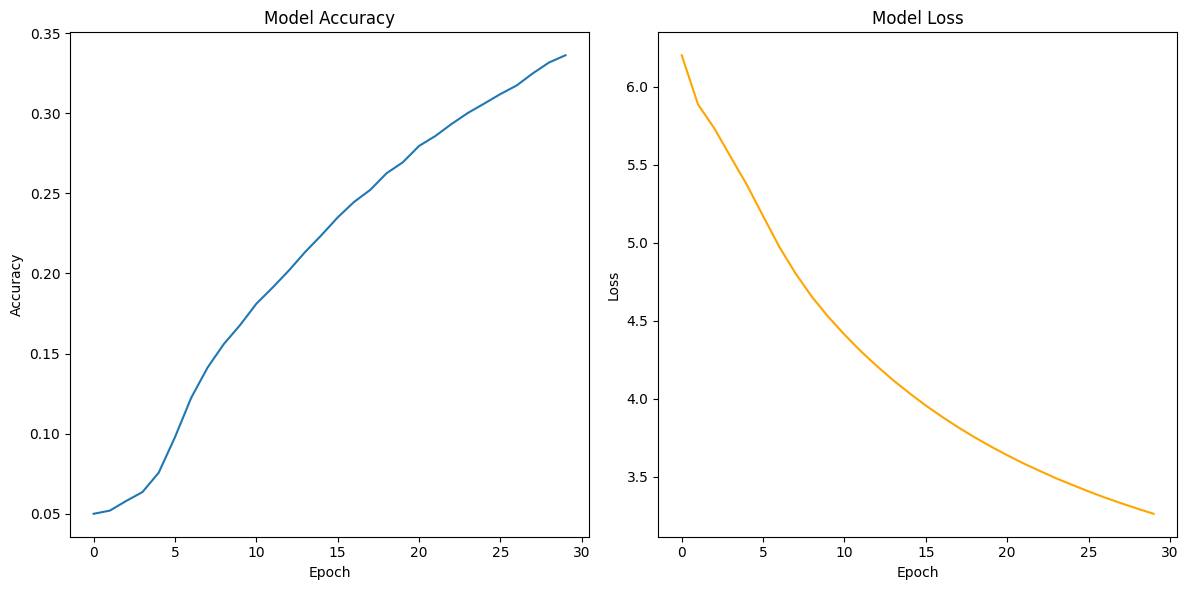

In [ ]:
plt.figure(figsize=(12, 6))  # Create a larger figure to accommodate both plots

# Plot for model accuracy
plt.subplot(1, 2, 1)  # Create subplot 1 (rows, columns, index)
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

# Plot for model loss
plt.subplot(1, 2, 2)  # Create subplot 2 (rows, columns, index)
plt.plot(history.history['loss'], color='orange')  # Use a different color for distinction
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.tight_layout()  # Adjust spacing between subplots for better layout
plt.show()  # Display the combined plot

### **Option 1: get a phrase adding N words**

In [ ]:
def exist(enter_sequence):
  lowercase_sequence = [word.lower() for word in enter_sequence]
  indices = [tokenizer.word_index.get(word) for word in lowercase_sequence]

  result = True
  for count, index in enumerate(indices):
    if index is None:
      print(f"'{enter_sequence[count]}' is not in the tokenizer's vocabulary")
      result = False
  return result

In [ ]:
def generate_seq(model, tokenizer, enter_sequence, n_pred):
    if exist(enter_sequence):
      in_text, result = enter_sequence, ' '.join(enter_sequence)

      # Generate a fixed number of words
      for _ in range(n_pred):
        # Encode the text as integers
        encoded = tokenizer.texts_to_sequences([in_text])[0]
        encoded = np.array(encoded)
        encoded = encoded.reshape(1, len(encoded))

        # Predict probabilities for each word in the vocabulary
        yhat_probs = model.predict(encoded, verbose=0)[0]

        # Get the index of the predicted word
        yhat_idx = np.argmax(yhat_probs)

        # Map predicted word index to word
        out_word = tokenizer.index_word.get(yhat_idx, '')  # Get the word if it exists, otherwise use an empty string

        # Append to input
        in_text, result = in_text[1:] + [out_word], result + ' ' + out_word

      print(result)

In [ ]:
# evaluate
generate_seq(model, tokenizer, ["you're", "mY"], 13)

you're mY best four years and you were trouble when you said i don't know


### **Option 2: get next N words**

In [ ]:
def get_next(model, tokenizer, enter_sequence, top_n=3):
  if exist(enter_sequence):
    in_text, result = enter_sequence, enter_sequence

    # Encode the text as integers
    encoded = tokenizer.texts_to_sequences([in_text])[0]
    encoded = np.array(encoded)
    encoded = encoded.reshape(1, len(encoded))

    # Predict probabilities for each word in the vocabulary
    yhat_probs = model.predict(encoded, verbose=0)[0]

    top_indices = np.argsort(-yhat_probs)[:top_n]

    for position, idx in enumerate(top_indices, start=1):
      print(f"{position:<3} {tokenizer.index_word[idx]:<12} {yhat_probs[idx]*100:.1f}%")

    decoded_words = [tokenizer.index_word[idx] for idx in top_indices]
    return decoded_words

In [ ]:
first_word = "my"
second_word = "best"
enter_sequence = [first_word, second_word]

get_next(model, tokenizer, enter_sequence, 5);

1   four         13.6%
2   friend       10.5%
3   eyes         9.0%
4   little       6.4%
5   dress        4.5%


### **Option 3: build a phrase choosing between N words**

In [ ]:
def build_phrase(model, tokenizer, enter_sequence, top_n=3):
  if exist(enter_sequence):
    in_text, result = enter_sequence, ' '.join(enter_sequence)

    quit = False
    print("Press 'q' to quit")
    while not quit:
      options = get_next(model, tokenizer, in_text, top_n)
      while True:
        choice = input(f"Please enter a number between 1 and {top_n}: ")
        if(choice=='q'):
          quit = True
          break
        if choice.isdigit():
          chosen_index = int(choice)
          if 1 <= chosen_index <= top_n:
            break
          else:
              print(f"Number is not in the range 1-{top_n}. Please try again.")

      out_word = options[chosen_index-1]

      in_text = in_text[1:] +[out_word]
      if not quit:
        result += ' ' + out_word
      print("-----")
      print(result)
      print("-----")

In [ ]:
build_phrase(model, tokenizer, ["you're", "my"], 3)

Press 'q' to quit
1   best         8.0%
2   heart        7.1%
3   turn         5.1%
Please enter a number between 1 and 3: 2
-----
you're my heart
-----
1   and          25.4%
2   in           6.7%
3   with         4.4%
Please enter a number between 1 and 3: 1
-----
you're my heart and
-----
1   hope         29.9%
2   i            8.1%
3   never        2.6%
Please enter a number between 1 and 3: 2
-----
you're my heart and i
-----
1   don't        13.9%
2   wish         5.7%
3   got          5.3%
Please enter a number between 1 and 3: 2
-----
you're my heart and i wish
-----
1   i            37.2%
2   you          35.9%
3   that         6.5%
Please enter a number between 1 and 3: 2
-----
you're my heart and i wish you
-----
1   would        38.9%
2   were         19.2%
3   knew         12.7%
Please enter a number between 1 and 3: 2
-----
you're my heart and i wish you were
-----
1   trouble      10.4%
2   so           8.2%
3   a            3.5%
Please enter a number between 1 and 3: 3
